In [2]:
using JLD2, Plots
include("scalar_wave_eq_2d.jl");

In [10]:
Nx = 101;
Ny = 101;
h = 1/Nx;
x = range(0, length=Nx, step=h);
y = range(0, length=Ny, step=h);
Fs = 1000;
dt = 1/Fs;
Nt = 1000;
t = range(0, length=Nt, step=dt);

# source
f = source_ricker(10, 0.2, t);
source_position = [51,51];

# velocity
vel = 3*ones(Nx,Ny);
# vel[1:10,:] .= 5;

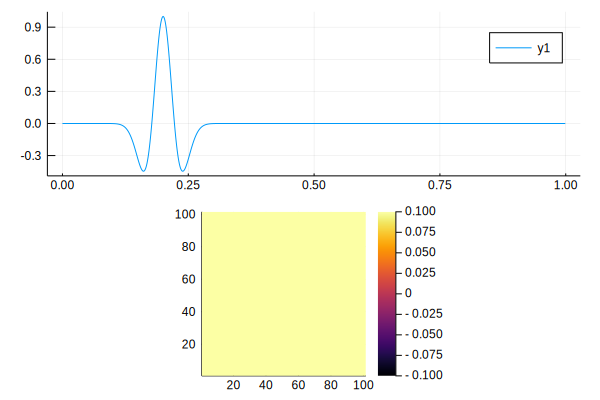

In [11]:
f1 = plot(t,f);
f2 = heatmap(vel, ratio=1);
plot(f1, f2, layout=grid(2,1))

In [12]:
wavefield = scalar_wave_eq_2d_solver(vel, f, source_position, Nx, Ny, h, dt, Nt);

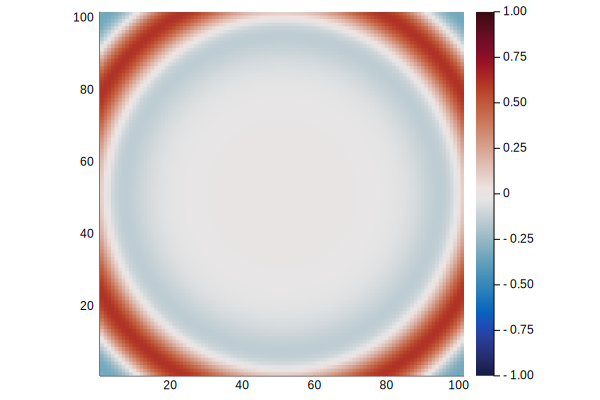

In [14]:
heatmap(wavefield[:,:,400], clim=(-1,1), ratio=1, fillcolor=:balance)

In [15]:
anim = @animate for i=1:Nt
    heatmap(wavefield[:,:,i], clim=(-1,1), ratio=1, fillcolor=:balance)
end every 10
gif(anim, "model1.gif", fps = 20)

┌ Info: Saved animation to 
│   fn = /Users/lida/Desktop/wave_eq_solver/model1.gif
└ @ Plots /Users/lida/.julia/packages/Plots/PGn1u/src/animation.jl:90


Plots.AnimatedGif("/Users/lida/Desktop/wave_eq_solver/model1.gif")

In [16]:
@load "marmousi.jld2"

4-element Array{Symbol,1}:
 :vel
 :Nx 
 :Ny 
 :h  

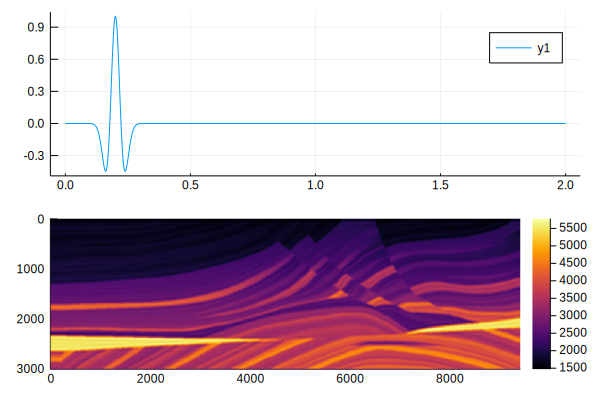

In [24]:
x = range(0, length=Nx, step=h);
y = range(0, length=Ny, step=h);

Nt = 2000;
t = range(0, length=Nt, step=dt);

# source
f = source_ricker(10, 0.2, t);
source_position = [200,5];

f1 = plot(t,f);
f2 = heatmap(x, y, vel', ratio=1, yflip=true);
plot(f1, f2, layout=grid(2,1))

In [23]:
wavefield = scalar_wave_eq_2d_solver(vel, f, source_position, Nx, Ny, h, dt, Nt);

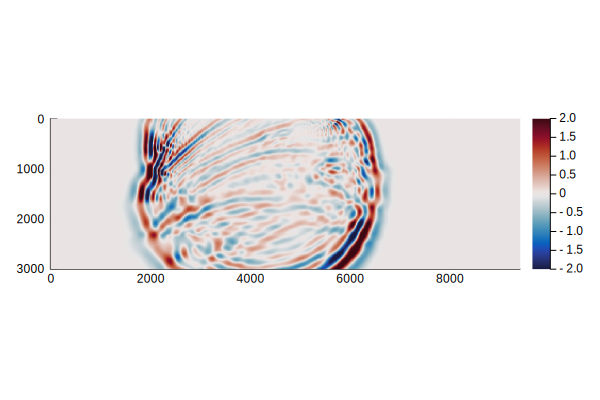

In [27]:
heatmap(x,y,wavefield[:,:,1500]', clim=(-2,2), ratio=1, fillcolor=:balance, yflip=true)

In [28]:
anim = @animate for i=1:Nt
    heatmap(wavefield[:,:,i]', clim=(-2,2), ratio=1, fillcolor=:balance, yflip=true)
end every 10
gif(anim, "marmousi.gif", fps = 20)

┌ Info: Saved animation to 
│   fn = /Users/lida/Desktop/wave_eq_solver/marmousi.gif
└ @ Plots /Users/lida/.julia/packages/Plots/PGn1u/src/animation.jl:90


Plots.AnimatedGif("/Users/lida/Desktop/wave_eq_solver/marmousi.gif")